In [1]:
from matplotlib import pyplot as plt

from loki.libloki.configs import PulsarSearchConfig
from loki.search import ffa_search
from pyloki.config import ParamLimits
from pyloki.simulation.pulse import PulseSignalConfig

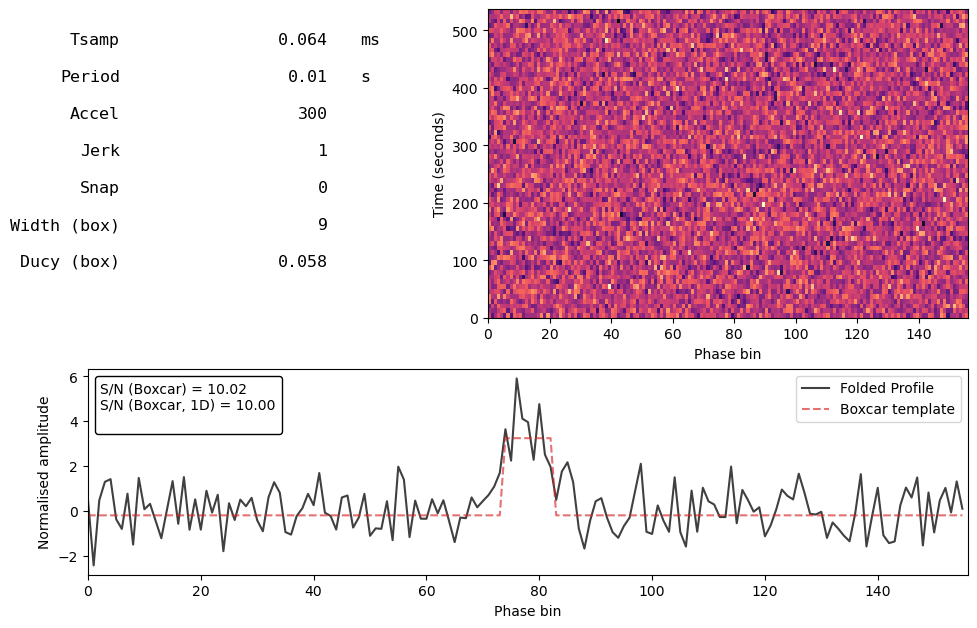

In [2]:
pulsar_period = 0.010
dt = 64e-6
accel = 300
jerk = 1
nsamps = 2**23
mod_kwargs = {"acc": accel, "jerk": jerk}
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, nsamps=nsamps, snr=10, ducy=0.1,
                        mod_kwargs=mod_kwargs)
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs)
plt.show()

In [3]:
tol_bins = 2 #cfg.tol_bins
fold_bins = 64 # cfg.fold_bins
p = ParamLimits.from_upper([jerk, accel, cfg.freq], (-1.5, 1.5), cfg.tobs)
print(f"Param limits: {p.limits}")
bseg_brute = cfg.nsamps // 128
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=p.limits,
                                bseg_brute=bseg_brute, ducy_max=0.2, wtsp=1.5, nthreads=8, use_fft_shifts=False)
ffa_plan, pgram = ffa_search(tim_data, search_cfg, quiet=False, show_progress=False)

Param limits: [(np.float64(-1.5), np.float64(1.5)), (np.float64(-102.65318400000001), np.float64(702.653184)), (np.float64(99.95511100138201), np.float64(100.04488899861799))]
[2025-08-18 18:37:06.576] [info] FFA Memory Usage: 1.42 GB (1 buffers) + 0.04 GB (coords)
[2025-08-18 18:37:06.692] [info] FFA::execute started
[2025-08-18 18:37:06.753] [info] FFA::initialize started
[2025-08-18 18:37:06.758] [info] FFA::initialize took 4 ms
[2025-08-18 18:37:06.806] [info] FFA::execute took 114 ms


In [4]:
print(pgram.get_indices_summary(true_values={"jerk": cfg.mod_kwargs["jerk"], "accel": cfg.mod_kwargs["acc"], "freq": cfg.freq},))
print(pgram.get_summary())

True param indices: (21, 76, 385)
Best param indices: (np.int64(21), np.int64(76), np.int64(385), np.int64(4))
Best S/N: 8.86
Best Period: 0.01
Best jerk: 1.0384615384615385
Best accel: 297.40223752258066
Best freq: 100.0
Best width: 6


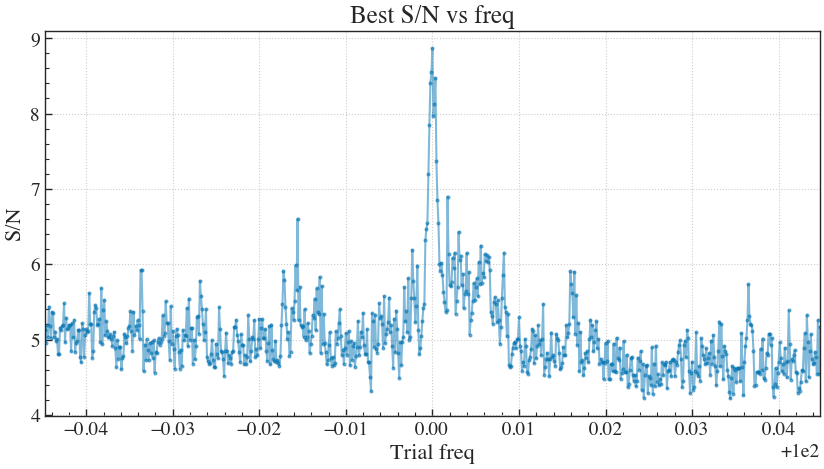

In [5]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()

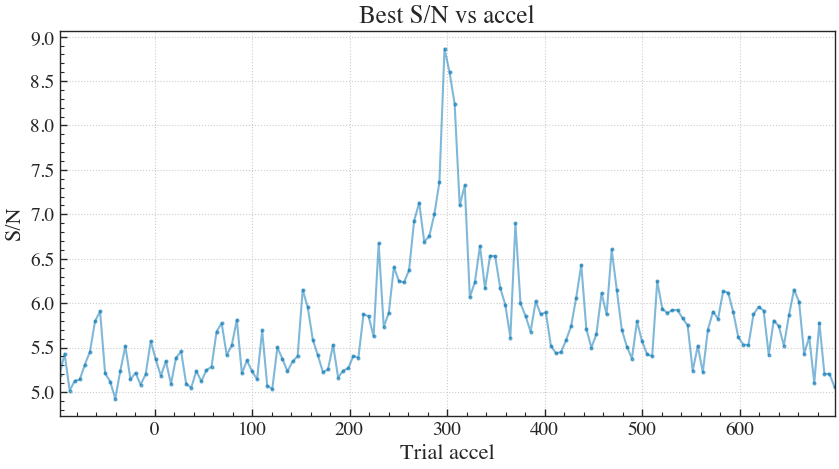

In [6]:
fig = pgram.plot_1d("accel", figsize=(10, 5))
plt.show()

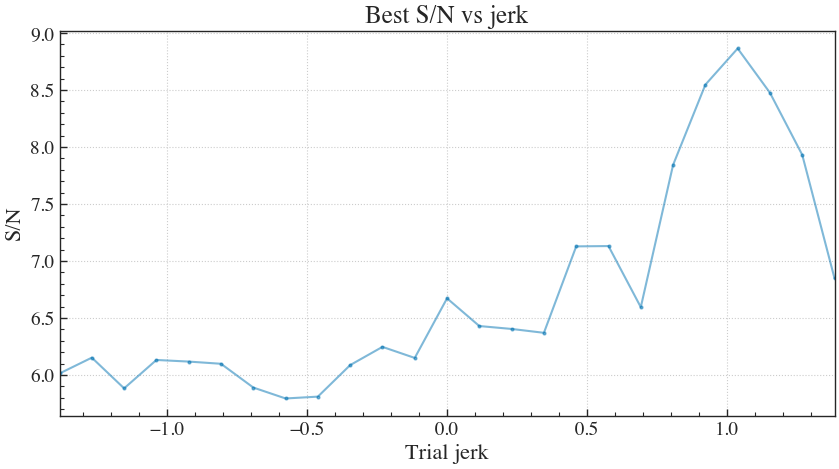

In [7]:
fig = pgram.plot_1d("jerk", figsize=(10, 5))
plt.show()

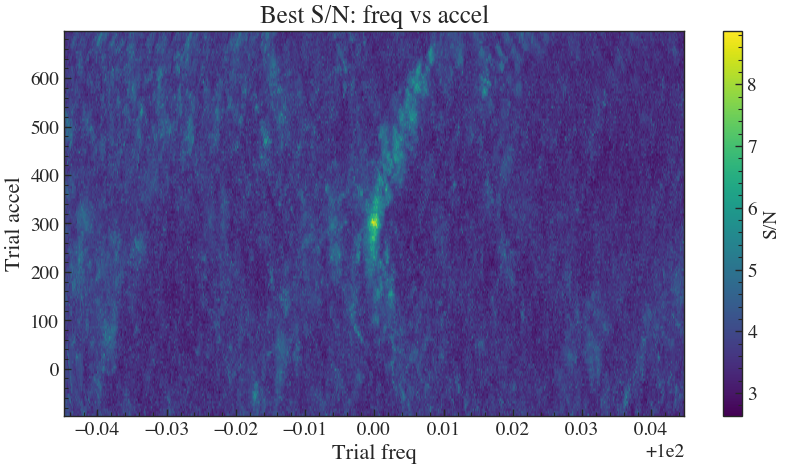

In [8]:
fig = pgram.plot_2d("freq", "accel", figsize=(10, 5))
plt.show()

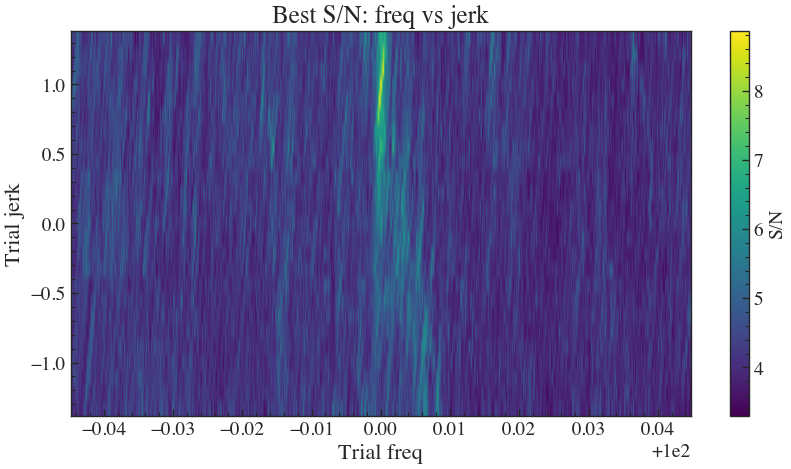

In [9]:
fig = pgram.plot_2d("freq", "jerk", figsize=(10, 5))
plt.show()

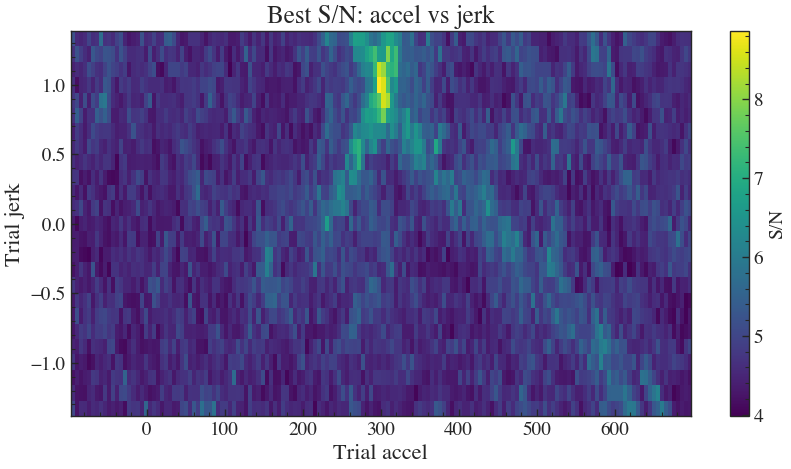

In [10]:
fig = pgram.plot_2d("accel", "jerk", figsize=(10, 5))
plt.show()

### FFT-SHIFT search

In [11]:
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=p.limits,
                                bseg_brute=bseg_brute, ducy_max=0.2, wtsp=1.5, use_fft_shifts=True)
ffa_plan, pgram = ffa_search(tim_data, search_cfg, quiet=False, show_progress=False)

[2025-08-18 18:37:08.181] [info] FFACOMPLEX Memory Usage: 1.46 GB (1 buffers) + 0.04 GB (coords)
[2025-08-18 18:37:08.305] [info] FFACOMPLEX::execute started
[2025-08-18 18:37:08.365] [info] FFACOMPLEX::initialize started
[2025-08-18 18:37:09.198] [info] FFACOMPLEX::initialize took 832 ms
[2025-08-18 18:37:09.803] [info] FFACOMPLEX::execute took 1497 ms


In [12]:
print(pgram.get_indices_summary(true_values={"jerk": cfg.mod_kwargs["jerk"], "accel": cfg.mod_kwargs["acc"], "freq": cfg.freq},))
print(pgram.get_summary())

True param indices: (21, 76, 385)
Best param indices: (np.int64(20), np.int64(77), np.int64(384), np.int64(4))
Best S/N: 9.35
Best Period: 0.010000011629287778
Best jerk: 0.9230769230769232
Best accel: 302.59776247741934
Best freq: 99.99988370725747
Best width: 6


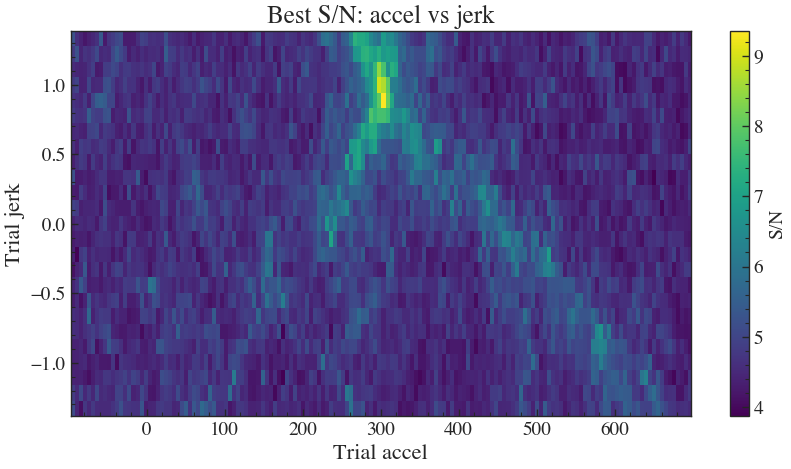

In [13]:
fig = pgram.plot_2d("accel", "jerk", figsize=(10, 5))
plt.show()